<a href="https://colab.research.google.com/github/anfalsiddiqui45/mental-health-models/blob/main/sbertlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

import matplotlib.pyplot as plt

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/test.csv")

X_train = train_df["statement"].tolist()
y_train = train_df["label"].tolist()

X_test = test_df["statement"].tolist()
y_test = test_df["label"].tolist()

In [6]:
#  Load SBERT Model & Encode Sentences
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_emb = model.encode(X_train, batch_size=32, show_progress_bar=True)
X_test_emb  = model.encode(X_test, batch_size=32, show_progress_bar=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/955 [00:00<?, ?it/s]

Batches:   0%|          | 0/239 [00:00<?, ?it/s]

In [7]:

sbert_lr = LogisticRegression(
    class_weight="balanced",
    max_iter=10000
)

sbert_lr.fit(X_train_emb, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [8]:

y_pred = sbert_lr.predict(X_test_emb)

In [9]:

print(classification_report(
    y_test,
    y_pred,
    target_names=["Normal", "Depression", "Anxiety", "Stress"]
))

              precision    recall  f1-score   support

      Normal       0.95      0.91      0.93      3269
  Depression       0.95      0.86      0.90      3081
     Anxiety       0.73      0.85      0.79       768
      Stress       0.47      0.78      0.59       517

    accuracy                           0.87      7635
   macro avg       0.78      0.85      0.80      7635
weighted avg       0.90      0.87      0.88      7635



In [10]:

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "macro_f1": f1_score(y_test, y_pred, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred, average="weighted"),
    "macro_precision": precision_score(y_test, y_pred, average="macro"),
    "macro_recall": recall_score(y_test, y_pred, average="macro")
}

metrics

{'accuracy': 0.8732154551407989,
 'macro_f1': 0.8024929768498907,
 'weighted_f1': 0.8812586345262741,
 'macro_precision': 0.7778903614319745,
 'macro_recall': 0.8494057866130162}

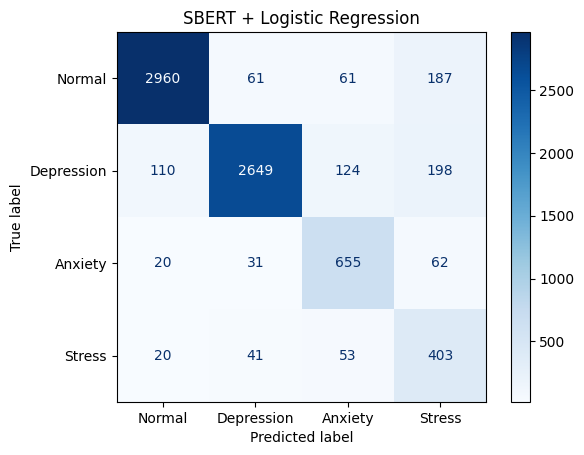

In [11]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Normal", "Depression", "Anxiety", "Stress"]
)

disp.plot(cmap="Blues")
plt.title("SBERT + Logistic Regression")
plt.show()


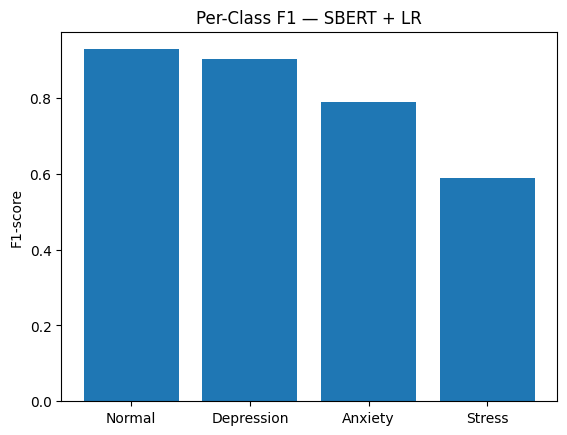

In [12]:
report = classification_report(
    y_test,
    y_pred,
    target_names=["Normal", "Depression", "Anxiety", "Stress"],
    output_dict=True
)

f1_scores = [report[c]["f1-score"] for c in report if c in ["Normal", "Depression", "Anxiety", "Stress"]]

plt.bar(["Normal", "Depression", "Anxiety", "Stress"], f1_scores)
plt.ylabel("F1-score")
plt.title("Per-Class F1 — SBERT + LR")
plt.show()
